# Install and Setup Qiskit

In [52]:
import qiskit

Check qiskit version

In [47]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': '0.7.0',
 'qiskit': '0.19.1'}

In [48]:
from qiskit import IBMQ

In [51]:
# Get your ibm token with steps from README and save in a secure location
ibm_token_file = 'secure/ibm_load_account.txt'
with open(ibm_token_file) as token_file:
    token = token_file.readline()

In [50]:
IBMQ.save_account(token)

configrc.store_credentials:WARNING:2020-05-28 11:22:52,539: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Hello World

In [6]:
from qiskit import *

In [7]:
# Build a 2-qubit quantum register
quantum_register = QuantumRegister(2)

In [8]:
# Build a 2 classical bit classical register to take measurements from quantum bits
classical_register = ClassicalRegister(2)

In [9]:
# Build a circuit using the above
circuit = QuantumCircuit(quantum_register, classical_register)

In [10]:
# Draw / visualize the circuit
%matplotlib inline

In [11]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

In order to create entanglement, apply the **Hadamard gate** on the first qubit.

In [12]:
circuit.h(quantum_register[0])

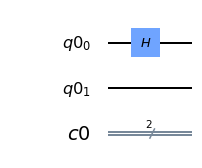

In [13]:
# Visualize the circuit
circuit.draw(output='mpl')

In [14]:
circuit.cx(quantum_register[0], quantum_register[1])

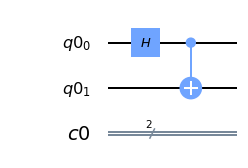

In [15]:
circuit.draw(output="mpl")

In [16]:
circuit.measure(quantum_register, classical_register)

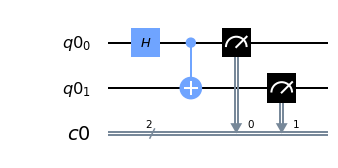

In [17]:
circuit.draw(output = "mpl")

### Run on Simulator

In [18]:
simulator = Aer.get_backend('qasm_simulator')

In [20]:
result = execute(circuit, backend = simulator).result()

In [21]:
from qiskit.tools.visualization import plot_histogram

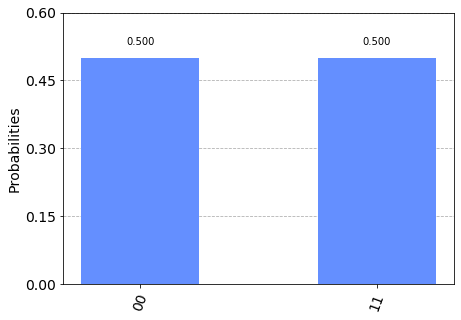

In [22]:
plot_histogram(result.get_counts(circuit))

### Run on Real IBM Quantum Computer

In [24]:
provider = IBMQ.get_provider('ibm-q')

In [25]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [26]:
job = execute(circuit, backend=qcomp)

In [27]:
from qiskit.tools.monitor import job_monitor

In [28]:
job_monitor(job)

Job Status: job has successfully run


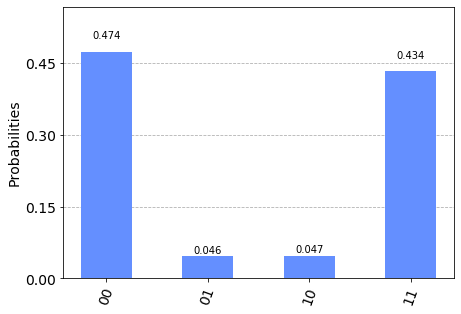

In [29]:
result = job.result()
plot_histogram(result.get_counts(circuit))

# Building Blocks of Quantum Circuits - Overview of Gates

In [1]:
from qiskit import *

In [2]:
from qiskit.tools.visualization import plot_bloch_multivector

In [3]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)

In [4]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


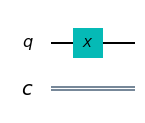

In [5]:
circuit.draw(output='mpl')

### Bloch sphere

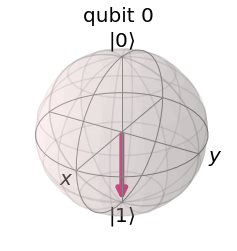

In [6]:
plot_bloch_multivector(statevector)

### Measurement

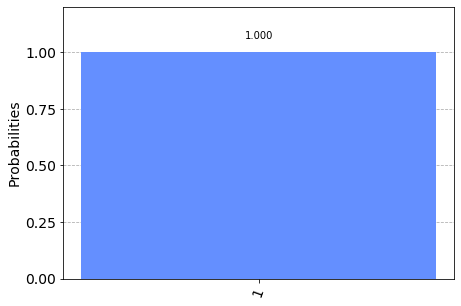

In [7]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Matrix representation of circuit

In [8]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)

simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


# Quantum Teleportation Algorithm

- What is Quantum Teleportation?
    - It is the transfer of quantum states from one qubit to another.
    - It doesn't mean physically transporting a qubit from one place to another.
    - It is the transportation of quantum information from one qubit to another.
    
- Why we do it?
    - In a classical computer, copying something and transferring it to another place isn't a problem.
    - In quantum computers, copying is not allowed, since the moment you copy you're implicitly doing a measurement
        which destroys the quantum state that you're trying to transfer from point A to point B.
    - In order to get around it, we take advantage of entanglement and build a quantum teleportation circuit.

In [33]:
from qiskit import *

In [34]:
# Quantum circuit of 3 quantum bits and 3 classical bits
circuit = QuantumCircuit(3, 3)

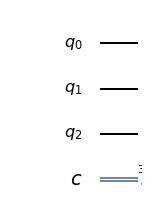

In [35]:
circuit.draw(output='mpl')

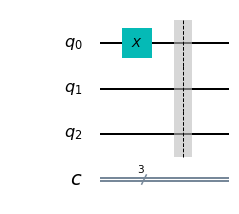

In [36]:
# We take the state in q0 to q2; q1 is used as a resource for this process.
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

In [37]:
# Apply hadamard gate
circuit.h(1)

# Apply controlled x gate betwen q1 and q2
circuit.cx(1, 2)

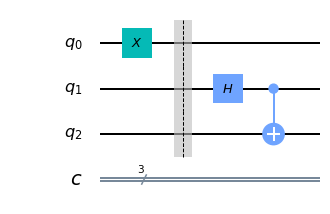

In [38]:
circuit.draw(output='mpl')

Now, q1 and q2 are entangled. The rest of the teleportation protocol dicates that we apply the following two gates:

- A controlled X gate going from q0 to q1.

- A hadamard gate on q0.

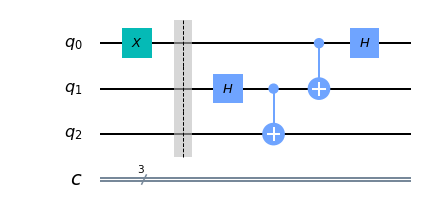

In [39]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

There's one more missing aspect to the teleportation circuit, and that is to do two measurements.
The measurements are going to be on q0 and q1.

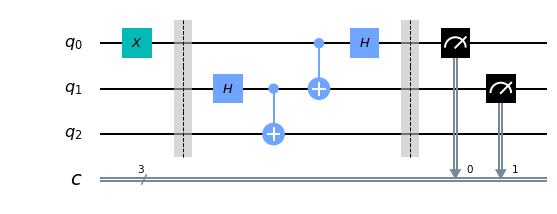

In [40]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

To complete teleportation protocol, we need to add two more gates, as shown below:

- Controlled x going from q1 to q2
- Controlled z going from q0 to q2

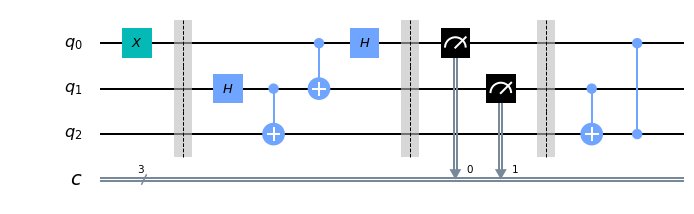

In [41]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

### Simulation

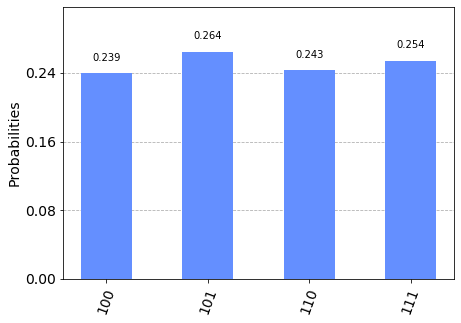

In [42]:
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Results
The x-axis is to be read as C2, C1, C0 in classical bits.

So 100 is read as result on C2=1, C1=0, C0=0.

So as we can see, we only get results where C2 equals to 1. This means the measurement results always have the state we want in that particular qubit, q2.

In [43]:
print(counts)

{'111': 260, '100': 245, '101': 270, '110': 249}


- So, what we've done is take the state in q0 and teleported it to the state in q2.
- There are many applications to this.
    - The key element is that there's **entanglement** here, which allows to take these two qubits far apart from each other.
    - This allows us to transfer quantum information over long distances.
    
TO DO:
- Try teleporting the state zero plus one over the square root of two.
    - This is the quantum state that you get when you apply a Hadamard gate, onto the zero quantum state.

# Bernstein-Vazirani Algorithm